In [ ]:
"""
Given some features of a breast tumor, determine if it is malignant (cancerous) or benign (not cancerous)
"""

# Answer Key Code

## Load Data (Provide this to students)

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Model Building + Visualization Code (Students generate on their own)

Train Accuracy: 0.9522613065326633
Test Accuracy: 0.9590643274853801


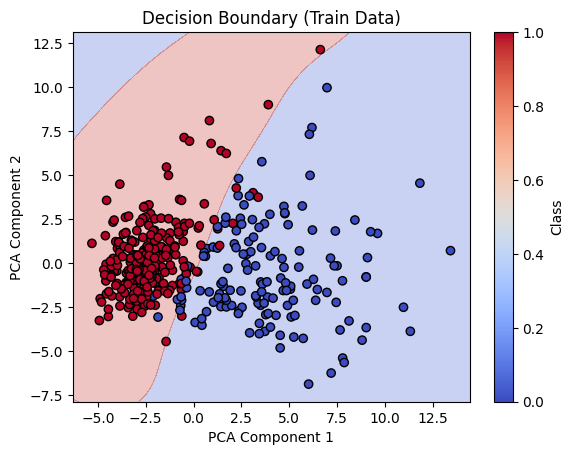

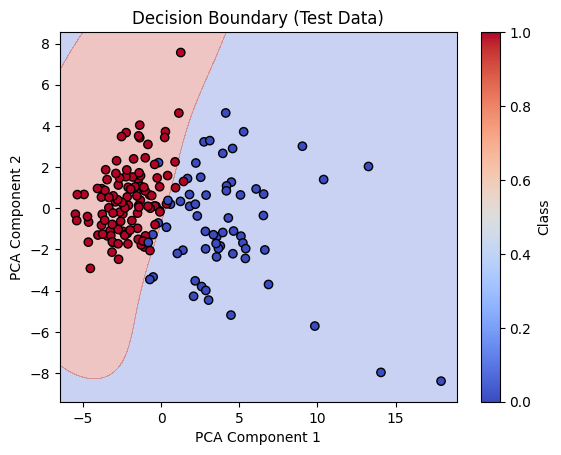

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use PCA to reduce data to 2 dimensions for visualization purposes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier (e.g., Support Vector Machine with RBF kernel)
classifier = SVC(kernel='rbf', random_state=42, probability=True)
classifier.fit(X_train_pca, y_train)

# Make predictions
y_train_pred = classifier.predict(X_train_pca)
y_test_pred = classifier.predict(X_test_pca)

# Print accuracy
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter, label='Class')
    plt.show()

# Plot decision boundaries for train data
plot_decision_boundaries(X_train_pca, y_train, classifier, "Decision Boundary (Train Data)")

# Plot decision boundaries for test data
plot_decision_boundaries(X_test_pca, y_test, classifier, "Decision Boundary (Test Data)")